# Introduction to Human Activity Recognition

Here we will explore some common ways of preprocessing human activity recognition data.

Using the example data we will learn:
* how to merge multiple files into one large DataFrame
* how to split data into sliding windows
* how to quickly extract features from a window
* how to set the number of classes considered for classification
* how to build a simple Random Forest Classifier and train it on HAR data
* how to build a simple CNN and train it on HAR data 

Bear in mind that the sample data offered is not cleaned or high quality. You should not use it in your own experiments but it is useful for this tutorial.

You will need the following packages: 
* tsfresh
* scikit-learn
* tensorflow

## Current Model Note for cw3 

#### Basic imports

In [1]:
import pandas as pd
import numpy as np
import tsfresh
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import tensorflow as tf

import os

import matplotlib.pyplot as plt

# keras goodies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv1D, Dropout, MaxPooling1D, BatchNormalization, LSTM
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import metrics as kmetrics
import tensorflow.keras.backend as K

## Loading multiple files into one large DataFrame

At this stage you should only be working with clean data, saved in the format required for Coursework 1. An example of such data can be found in the Data/Clean/ folder.

In [328]:
# DEPRECATED: New clean file was generated, which we will be used from now on
# base_df_old = pd.DataFrame()

# clean_data_folder = "../pdiot-data/2021"

# for sUNN_folder in os.listdir(clean_data_folder):
#     print(sUNN_folder)
#     try:
#         for filename in os.listdir(clean_data_folder+"/"+sUNN_folder):
            
#             full_path = f"{clean_data_folder}/{sUNN_folder}/{filename}"
# #             print(full_path)

#             # load data into a DataFrame
#             new_df = pd.read_csv(full_path)

#             # merge into the base DataFrame
#             base_df_old = pd.concat([base_df, new_df])
#     except:
#         print(sUNN_folder, " is not a folder")


s1870467
s1870697
s2171931
s2254050
s1727780
s2125423
.DS_Store
.DS_Store  is not a folder
s1757177
s1702583
s1824891
Respeck_recordings_clean.csv
Respeck_recordings_clean.csv  is not a folder
s1826390
s1865890
s1823274
s1865457
s1800883
s1718069
s1706154
s1864705
s1817455
Thingy_recordings_clean.csv
Thingy_recordings_clean.csv  is not a folder
s2211162
s1761322
s1970333
s2192970
s2181154
s1711661
s2250677
s1893474
s2119637
s1721256
s1704145
s1894401
s1541031
s1843072
s1893835
README.md
README.md  is not a folder
s2173036
s2212045
s1813106
s1891214
s1724279
s1822958
s1841064
s2171825
s1714206
s1801931
s1842093
s1724067
s1732873
s1817972
s1850642
s2211228


In [330]:
base_df = base_df_old

In [345]:
#Load Clean Respeck Recording to base_df
clean_data_folder = "../pdiot-data/2021/Respeck_recordings_clean.csv"
base_df = pd.read_csv(clean_data_folder)

/Users/Wassim/miniconda3/envs/pdiot/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [346]:
base_df

,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,sensor_type,activity_type,activity_code,subject_id,notes,recording_id
0,1.633516e+12,0.261475,-1.116516,-0.502991,-0.812500,12.312500,19.500000,Respeck,Climbing stairs,12.0,s1870467,rob,Respeck_s1870467_Climbing stairs_06-10-2021_11...
1,1.633516e+12,-0.177734,-0.636292,-0.477600,-5.265625,2.953125,-9.281250,Respeck,Climbing stairs,12.0,s1870467,rob,Respeck_s1870467_Climbing stairs_06-10-2021_11...
2,1.633516e+12,0.351562,-0.879456,-0.335754,5.671875,24.656250,-10.562500,Respeck,Climbing stairs,12.0,s1870467,rob,Respeck_s1870467_Climbing stairs_06-10-2021_11...
3,1.633516e+12,0.298584,-1.253479,-0.299622,-3.609375,2.687500,5.890625,Respeck,Climbing stairs,12.0,s1870467,rob,Respeck_s1870467_Climbing stairs_06-10-2021_11...
4,1.633516e+12,0.056152,-0.777405,-0.210754,-14.328125,5.421875,8.140625,Respeck,Climbing stairs,12.0,s1870467,rob,Respeck_s1870467_Climbing stairs_06-10-2021_11...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
492671,1.632930e+12,-0.376465,-0.746399,0.693543,-0.171875,-0.953125,1.281250,Respeck,Sitting bent backward,5.0,s2211228,NaN,Respeck_s2211228_Sitting bent backward_29-09-2...
492672,1.632930e+12,-0.345703,-0.749329,0.677429,-0.671875,-0.187500,-1.015625,Respeck,Sitting bent backward,5.0,s2211228,NaN,Respeck_s2211228_Sitting bent backward_29-09-2...
492673,1.632930e+12,-0.368408,-0.745422,0.690857,-0.218750,-0.640625,0.375000,Respeck,Sitting bent backward,5.0,s2211228,NaN,Respeck_s2211228_Sitting bent backward_29-09-2...
492674,1.632930e+12,-0.363281,-0.747375,0.689148,0.078125,0.796875,-0.046875,Respeck,Sitting bent backward,5.0,s2211228,NaN,Respeck_s2211228_Sitting bent backward_29-09-2...


In [347]:
columns_of_interest_initial = ['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z','subject_id','activity_code', 'activity_type','recording_id']

In [349]:
base_df = base_df.dropna(subset=columns_of_interest_initial).reset_index(drop=True)
base_df

,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,sensor_type,activity_type,activity_code,subject_id,notes,recording_id
0,1.633516e+12,0.261475,-1.116516,-0.502991,-0.812500,12.312500,19.500000,Respeck,Climbing stairs,12.0,s1870467,rob,Respeck_s1870467_Climbing stairs_06-10-2021_11...
1,1.633516e+12,-0.177734,-0.636292,-0.477600,-5.265625,2.953125,-9.281250,Respeck,Climbing stairs,12.0,s1870467,rob,Respeck_s1870467_Climbing stairs_06-10-2021_11...
2,1.633516e+12,0.351562,-0.879456,-0.335754,5.671875,24.656250,-10.562500,Respeck,Climbing stairs,12.0,s1870467,rob,Respeck_s1870467_Climbing stairs_06-10-2021_11...
3,1.633516e+12,0.298584,-1.253479,-0.299622,-3.609375,2.687500,5.890625,Respeck,Climbing stairs,12.0,s1870467,rob,Respeck_s1870467_Climbing stairs_06-10-2021_11...
4,1.633516e+12,0.056152,-0.777405,-0.210754,-14.328125,5.421875,8.140625,Respeck,Climbing stairs,12.0,s1870467,rob,Respeck_s1870467_Climbing stairs_06-10-2021_11...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
492670,1.632930e+12,-0.376465,-0.746399,0.693543,-0.171875,-0.953125,1.281250,Respeck,Sitting bent backward,5.0,s2211228,NaN,Respeck_s2211228_Sitting bent backward_29-09-2...
492671,1.632930e+12,-0.345703,-0.749329,0.677429,-0.671875,-0.187500,-1.015625,Respeck,Sitting bent backward,5.0,s2211228,NaN,Respeck_s2211228_Sitting bent backward_29-09-2...
492672,1.632930e+12,-0.368408,-0.745422,0.690857,-0.218750,-0.640625,0.375000,Respeck,Sitting bent backward,5.0,s2211228,NaN,Respeck_s2211228_Sitting bent backward_29-09-2...
492673,1.632930e+12,-0.363281,-0.747375,0.689148,0.078125,0.796875,-0.046875,Respeck,Sitting bent backward,5.0,s2211228,NaN,Respeck_s2211228_Sitting bent backward_29-09-2...


<AxesSubplot:>

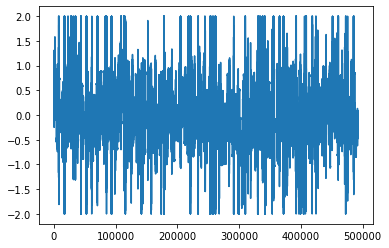

In [352]:
base_df['accel_x'].plot()

<AxesSubplot:>

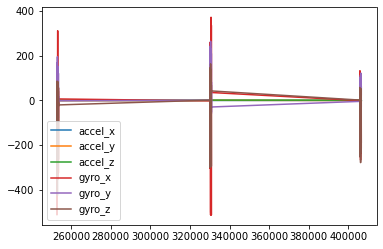

In [381]:
len(base_df.activity_type.values == 'Falling on Knees')

base_df[base_df['activity_type'] == 'Falling on the back'][columns_of_interest_training].plot()

Now you can get a list of all recording ids, activities, sensor types and anything else you might need.

In [353]:
print(f"The data was collected using the sensors: {base_df.sensor_type.unique()}")
print(f"The data was collected for the activities: {base_df.activity_type.unique()}")
print(f"The number of unique recordings is: {len(base_df.recording_id.unique())}")
print(f"The subject IDs in the recordings are: {len(base_df.subject_id.unique())}")

The data was collected using the sensors: ['Respeck']
The data was collected for the activities: ['Climbing stairs' 'Standing' 'Movement' 'Lying down on stomach'
 'Sitting bent backward' 'Lying down left' 'Lying down on back'
 'Descending stairs' 'Sitting bent forward' 'Walking at normal speed'
 'Running' 'Lying down right' 'Desk work' 'Sitting' 'Falling on knees'
 'Falling on the back' 'Falling on the right' 'Falling on the left']
The number of unique recordings is: 876
The subject IDs in the recordings are: 46


In [334]:
from sklearn.model_selection import GroupShuffleSplit

X_with_subject_id = base_df[columns_of_interest_initial]
y_with_subject_id = base_df['activity_code']



# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     test_size=0.2, train_size=0.8)

#Split by subject id
gs = GroupShuffleSplit(n_splits=2, test_size=0.2, random_state=1)
train_ix, test_ix = next(gs.split(X_with_subject_id, y_with_subject_id, groups=X_with_subject_id.subject_id))


X_train_df = X_with_subject_id.loc[train_ix]
X_test_df = X_with_subject_id.loc[test_ix]

y_train_df = y_with_subject_id.loc[train_ix]
y_test_df = y_with_subject_id.loc[test_ix]




# #Convert categorical variable (labels) into dummy/indicator variables (one-hot encoding)
# y_train = np.asarray(pd.get_dummies(y_train), dtype=np.float32)
# y_test = np.asarray(pd.get_dummies(y_test), dtype=np.float32)




In [335]:
#Check how many subject_ids are in each of training and test set
print(f"The subject IDs in the recordings are: {len(base_df.subject_id.unique())}")
print(f"The subject IDs in the training set are: {len(X_train_df.subject_id.unique())}")
print(f"The subject IDs in the test set are: {len(X_test_df.subject_id.unique())}")

The subject IDs in the recordings are: 46
The subject IDs in the training set are: 36
The subject IDs in the test set are: 10


You can of course change the clean data folder to where you keep all the PDIoT data and you should be seeing a lot more subject IDs, unique recordings and activity types.

## Splitting data into sliding windows

The sliding window approach is one of the most efficient ways to process Human Activity Recognition data. We saw in the last notebook that sensor data comes in the form of Time Series. One single datapoint is not enough to represent an activity, we need a larger snapshot of the signal for that. The image below shows how a sliding window achieves that. 

![sliding windows](../Images/sliding_windows_complete.png "Sliding Windows")

The windows can have some amount of overlap, as shown in the picture, or they can have no overlap at all in which case they would be side-by-side.

Each window can now be treated as an input datapoint to whichever model you choose to train. 

### Watch out for separate recordings

You need to make sure that when you split your data into sliding windows you don't accidentally include two separate recordings in the same window. This would cause the signal from the first recording to suddenly "jump" to an unrelated value from the second recording. 

For this, you will have to first split up your dataset by recording (this is where the recording ID comes in), then you have to split each recording into sliding windows. At the end you can aggregate all of your resulting sliding windows in a large dataset.

## From sliding windows to datapoints

Each sliding window needs to be further processed in order to represent an appropriate input datapoint. The preprocessing methods might differ depending on which type of model you choose to use. 

You can also do further processing on the signal types and axes, for example smooth the signal, apply axis fusion, eliminate noise etc. 

Here we will discuss simple examples without any preprocessing. 

### Feature extraction with tsfresh

Now the index represents the window ID, and each row in the DataFrame represents a multi-dimensional datapoint which we can use as input to the RFC.

You can use the window ID to refer back to the initial dataframe and get the class (activity type) for each window.

We will now process both recordings so that we have two classes for our classifier. For your own work you should only aim to perform classification on data from one sensor. 

In [384]:

def group_into_sliding_windows(df,window_size=50,step_size=25):

    window_number = 0 # start a counter at 0 to keep track of the window number

    all_overlapping_windows = []


    for rid, group in df.groupby("recording_id"):
        print(f"Processing rid = {rid}")
        large_enough_windows = [window for window in group.rolling(window=window_size, min_periods=window_size) if len(window) == window_size]

        

        overlapping_windows = large_enough_windows[::step_size] 
        print(len(overlapping_windows))
        # then we will append a window ID to each window
        if overlapping_windows:
            for window in overlapping_windows:
                window.loc[:, 'window_id'] = window_number
                window_number += 1


            all_overlapping_windows.append(pd.concat(overlapping_windows).reset_index(drop=True))
        
    final_sliding_windows = pd.concat(all_overlapping_windows).reset_index(drop=True)
    
    #Test to see if there are any elements that have NaN
    is_NaN = final_sliding_windows.isnull()
    row_has_NaN = is_NaN.any(axis=1)
    rows_with_NaN = final_sliding_windows[row_has_NaN]

    print(rows_with_NaN)
    return final_sliding_windows.reset_index(drop=True)

In [385]:
window_size = 50 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 25 # this is 50% overlap (step_size=25)

X_train_sliding_windows = group_into_sliding_windows(X_train_df,window_size,step_size)
X_test_sliding_windows = group_into_sliding_windows(X_test_df,window_size,step_size)

Processing rid = Respeck_s1541031_Climbing stairs_06-10-2021_11-25-43
29
Processing rid = Respeck_s1541031_Descending stairs_06-10-2021_11-25-05
30
Processing rid = Respeck_s1541031_Desk work_06-10-2021_11-04-49
30
Processing rid = Respeck_s1541031_Lying down left_06-10-2021_14-30-04
29
Processing rid = Respeck_s1541031_Lying down on back_06-10-2021_11-15-13
29
Processing rid = Respeck_s1541031_Lying down on stomach_06-10-2021_14-30-50
30
Processing rid = Respeck_s1541031_Lying down right_06-10-2021_14-27-40
30
Processing rid = Respeck_s1541031_Movement_06-10-2021_11-11-18
30
Processing rid = Respeck_s1541031_Running_08-10-2021_12-10-37
30
Processing rid = Respeck_s1541031_Sitting bent backward_06-10-2021_14-33-45
29
Processing rid = Respeck_s1541031_Sitting bent forward_06-10-2021_14-32-55
29
Processing rid = Respeck_s1541031_Sitting_06-10-2021_10-25-01
29
Processing rid = Respeck_s1541031_Standing_06-10-2021_11-10-10
29
Processing rid = Respeck_s1541031_Walking at normal speed_06-10-

30
Processing rid = Respeck_s1757177_Lying down on stomach_02-10-2021_20-00-57
30
Processing rid = Respeck_s1757177_Lying down right_06-10-2021_20-38-38
30
Processing rid = Respeck_s1757177_Movement_06-10-2021_16-44-16
30
Processing rid = Respeck_s1757177_Running_02-10-2021_14-09-21
30
Processing rid = Respeck_s1757177_Sitting bent backward_06-10-2021_16-40-06
30
Processing rid = Respeck_s1757177_Sitting bent forward_06-10-2021_16-41-05
30
Processing rid = Respeck_s1757177_Sitting_02-10-2021_13-38-45
30
Processing rid = Respeck_s1757177_Standing_02-10-2021_13-46-10
30
Processing rid = Respeck_s1757177_Walking at normal speed_02-10-2021_14-01-07
30
Processing rid = Respeck_s1761322_Climbing stairs_06-10-2021_11-51-15
29
Processing rid = Respeck_s1761322_Descending stairs_06-10-2021_11-52-16
29
Processing rid = Respeck_s1761322_Desk work_06-10-2021_12-22-13
29
Processing rid = Respeck_s1761322_Lying down left_27-09-2021_11-00-29
29
Processing rid = Respeck_s1761322_Lying down on back_27-

29
Processing rid = Respeck_s1823274_Standing_29-09-2021_12-23-09
29
Processing rid = Respeck_s1823274_Walking at normal speed_29-09-2021_12-30-31
29
Processing rid = Respeck_s1824891_Climbing stairs_06-10-2021_17-03-00
29
Processing rid = Respeck_s1824891_Descending stairs_06-10-2021_17-01-27
29
Processing rid = Respeck_s1824891_Desk work_06-10-2021_16-55-14
29
Processing rid = Respeck_s1824891_Lying down left_06-10-2021_16-48-30
29
Processing rid = Respeck_s1824891_Lying down on back_06-10-2021_16-45-46
29
Processing rid = Respeck_s1824891_Lying down on stomach_06-10-2021_16-51-24
29
Processing rid = Respeck_s1824891_Lying down right_06-10-2021_16-49-56
29
Processing rid = Respeck_s1824891_Movement_06-10-2021_16-53-11
29
Processing rid = Respeck_s1824891_Running_06-10-2021_17-05-47
29
Processing rid = Respeck_s1824891_Sitting bent backward_06-10-2021_16-42-14
29
Processing rid = Respeck_s1824891_Sitting bent forward_06-10-2021_16-41-00
29
Processing rid = Respeck_s1824891_Sitting_07-

ValueError: No objects to concatenate

In [383]:
X_train_sliding_windows['recording_id']

0         Respeck_s1541031_Climbing stairs_06-10-2021_11...
1         Respeck_s1541031_Climbing stairs_06-10-2021_11...
2         Respeck_s1541031_Climbing stairs_06-10-2021_11...
3         Respeck_s1541031_Climbing stairs_06-10-2021_11...
4         Respeck_s1541031_Climbing stairs_06-10-2021_11...
                                ...                        
932870    xlstry-Respeck_s2254050_Lying down on back_06-...
932871    xlstry-Respeck_s2254050_Lying down on back_06-...
932872    xlstry-Respeck_s2254050_Lying down on back_06-...
932873    xlstry-Respeck_s2254050_Lying down on back_06-...
932874    xlstry-Respeck_s2254050_Lying down on back_06-...
Name: recording_id, Length: 932875, dtype: object

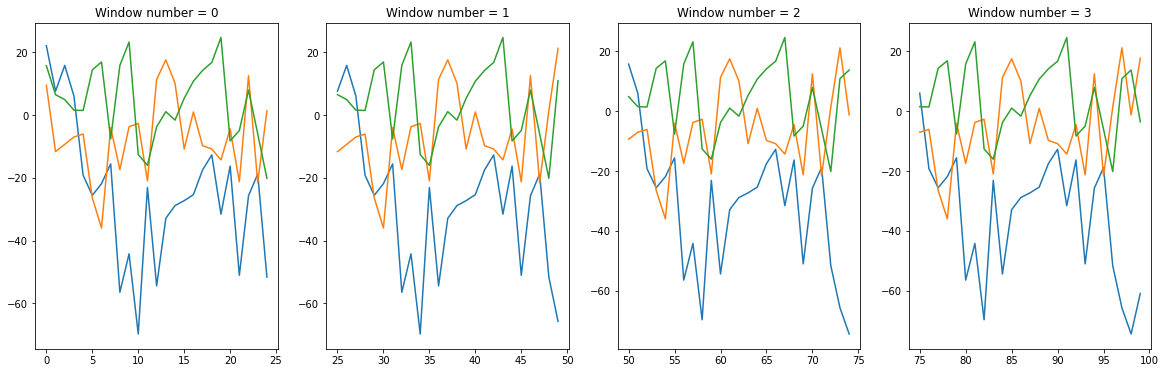

In [316]:
first_four_windows = [group for _, group in X_train_sliding_windows[X_train_sliding_windows.window_id < 4].groupby("window_id")]

fig, ax = plt.subplots(1, 4, figsize=(20, 6))

for i in range(4):
    ax[i].plot(first_four_windows[i]['gyro_x'])
    ax[i].plot(first_four_windows[i]['gyro_y'])
    ax[i].plot(first_four_windows[i]['gyro_z'])
    ax[i].set_title(f"Window number = {first_four_windows[i].window_id.values[0]}")

We need to assign a number to each categorical class for the model. It is mainly up to you how you categorise your classes. In this example, we will use the labels:

In [10]:
class_labels = {}
label_to_activity = {}
activities = sorted(base_df.activity_type.unique())

for idx, activity in enumerate(activities):
    class_labels[activity] = idx
    label_to_activity[idx] = activity

print(class_labels)

{'Climbing stairs': 0, 'Descending stairs': 1, 'Desk work': 2, 'Falling on knees': 3, 'Falling on the back': 4, 'Falling on the left': 5, 'Falling on the right': 6, 'Lying down left': 7, 'Lying down on back': 8, 'Lying down on stomach': 9, 'Lying down right': 10, 'Movement': 11, 'Running': 12, 'Sitting': 13, 'Sitting bent backward': 14, 'Sitting bent forward': 15, 'Standing': 16, 'Walking at normal speed': 17}


In [40]:

# window_id_class_labels = final_sliding_windows.groupby("window_id")[['activity_type']].agg(np.min).replace(class_labels)
# window_id_class_labels


## Leave-one-subject-out cross-validation

One of the other reason our previous classifier functions so well is that each person performs activities in a very consistent manner. If a subject's data is both in the training set and the test set, it provides the model with an unfair advantage. Moreover, the results that your model will output will be falsely high. When you test your model on a completely new, unseen subject, your accuracy will drop considerably. 

This is why when training a HAR model you will want to do a special kind of cross-validation: Leave-One-Subject-Out (LOSOXV), where we leave one (or more) subject(s) in the testing set at each iteration.

![losoxv](../Images/LOOCV.png "losoxv")

This ensures that the results we get from our classifier are consistent to what we would get in real life, if we were to test the model on a new user.

## Training a simple CNN

There are some different preprocessing techniques you can apply when the resulting "datapoint" is an input to a convolutional neural network. 

You can use two types of convolutional layers:
* 1D Conv Layers - which will work on 1D data, for example a single axis from one single sensor (accel, gyro or mag)
* 2D Conv Layers - suitable if the input data is in the form of an image, for example

We will be demonstrating how to build a simple 1D CNN using 6 channels: the 3 axes of the accelerometer and the 3 axes of the gyroscope.

### Setting up the model

In [ ]:
filters = 64
kernel_size = 3
n_features = 6
activation='relu'
n_classes = len(class_labels)
print(n_classes)

### LSTM

In [338]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import LSTM

timesteps = window_size
model = Sequential()
model.add(Dropout(0.2, input_shape=(timesteps,n_features))) 
model.add(LSTM(32))

# model.add(LSTM(64, input_shape=(timesteps,n_features)))
# Dropout layer
model.add(Dropout(0.2)) 
# Dense layer with ReLu
# model.add(Dense(units = 32, activation='relu'))
# model.add(Dropout(0.5)) 
# model.add(Dense(units = 32, activation='relu'))
# model.add(Dense(32, activation='relu',input_shape=(timesteps,n_features)))
model.add(Dense(n_classes, activation='softmax'))
model.summary()




Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_48 (Dropout)         (None, 25, 6)             0         
_________________________________________________________________
lstm_53 (LSTM)               (None, 32)                4992      
_________________________________________________________________
dropout_49 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_85 (Dense)             (None, 18)                594       
Total params: 5,586
Trainable params: 5,586
Non-trainable params: 0
_________________________________________________________________


In [339]:
X_train_regenerated, y_train_regenerated = regenerate_data_from_sliding_windows(X_train_sliding_windows, is_lstm=True)
X_test_regenerated, y_test_regenerated = regenerate_data_from_sliding_windows(X_test_sliding_windows,is_lstm=True)


In [340]:

#Convert categorical variable (labels) into dummy/indicator variables (one-hot encoding)
y_train = np.asarray(pd.get_dummies(y_train_regenerated), dtype=np.float32)
y_test = np.asarray(pd.get_dummies(y_test_regenerated), dtype=np.float32)

X_train = np.asarray(X_train_regenerated)
X_test = np.asarray(X_test_regenerated)

# X_train = np.reshape(X_train_regenerated, (X_train_regenerated.shape[0], 50, X_train_regenerated.shape[1]))
# X_test = np.reshape(X_test_regenerated, (X_test_regenerated.shape[0], 50, X_test_regenerated.shape[1]))

print(f"X_train shape = {X_train.shape}")
print(f"y_train shape = {y_train.shape}")

print(f"X_test shape = {X_test.shape}")
print(f"y_test shape = {y_test.shape}")

X_train shape = (37315, 25, 6)
y_train shape = (37315, 18)
X_test shape = (10249, 25, 6)
y_test shape = (10249, 18)


## CNN

In [223]:
model = Sequential()

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear', 
                 input_shape=(window_size, n_features)))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dropout(0.3))

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dropout(0.3))


model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 18, 64)            1216      
_________________________________________________________________
batch_normalization_11 (Batc (None, 18, 64)            256       
_________________________________________________________________
activation_11 (Activation)   (None, 18, 64)            0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 18, 64)            0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 16, 64)            12352     
_________________________________________________________________
batch_normalization_12 (Batc (None, 16, 64)            256       
_________________________________________________________________
activation_12 (Activation)   (None, 16, 64)          

### Re-generating the data in the appropriate format

We need to do a bit more work with our data to bring it into a format fit for training a CNN. 

A CNN will take multi-dimensional arrays as input. We have already specified that the input shape is (window_size, n_features), i.e. (50, 6). 

Remember that we generated sliding windows before. Now we just need to take the raw values from each window and create a training set. 

In [13]:
#Subject id is of interest to us as we will split our dataset by subject_id
columns_of_interest_training = ['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']
columns_of_interest_training

['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']

In [183]:
def regenerate_data_from_sliding_windows(final_sliding_windows, is_lstm=False):
    X= []
    y= []

    for window_id, group in final_sliding_windows.groupby('window_id'):
        
#         print(f"window_id = {window_id}")

        shape = group[columns_of_interest_training].values.shape
#         print(f"shape = {shape}")
        X.append(group[columns_of_interest_training].values )
        y.append(class_labels[group["activity_type"].values[0]])
    
    return X,y


In [ ]:
X_train_regenerated, y_train_regenerated = regenerate_data_from_sliding_windows(X_train_sliding_windows)
X_test_regenerated, y_test_regenerated = regenerate_data_from_sliding_windows(X_test_sliding_windows)


We can do a similar test/train split for demonstration purposes. Remember that you will have to split your data by subjects, not radomly.

In [185]:
# #Convert categorical variable (labels) into dummy/indicator variables (one-hot encoding)
y_train = np.asarray(pd.get_dummies(y_train_regenerated), dtype=np.float32)
y_test = np.asarray(pd.get_dummies(y_test_regenerated), dtype=np.float32)

X_train = np.asarray(X_train_regenerated)
X_test = np.asarray(X_test_regenerated)

print(f"X_train shape = {X_train.shape}")
print(f"y_train shape = {y_train.shape}")

print(f"X_test shape = {X_test.shape}")
print(f"y_test shape = {y_test.shape}")

X_train shape = (37688, 20, 6)
y_train shape = (37688, 18)
X_test shape = (10366, 20, 6)
y_test shape = (10366, 18)


Now we are ready to start the training process

In [341]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
# model.compile(
#     optimizer=optimizers.SGD(lr=0.01, momentum=0.9, decay=0.001, nesterov=True),
#     loss="categorical_crossentropy",
#     metrics = ['accuracy'])
model.compile(
      optimizer = optimizers.Adam(learning_rate=0.001),
          loss="categorical_crossentropy",
    metrics = ['accuracy'])

In [303]:
X_test.shape

(10224, 25, 6)

In [304]:
X_train.shape

(37315, 25, 6)

In [342]:
model.fit(X_train, y_train,
        batch_size=4048, epochs=200, callbacks=[callback],
        validation_data=(X_test, y_test),
)


Train on 37315 samples, validate on 10249 samples
Epoch 1/200
37315/37315 [==============================] - 14s 383us/sample - loss: 2.8826 - accuracy: 0.0779 - val_loss: 2.7819 - val_accuracy: 0.1839
Epoch 2/200
37315/37315 [==============================] - 9s 244us/sample - loss: 2.7789 - accuracy: 0.1643 - val_loss: 2.6640 - val_accuracy: 0.2957
Epoch 3/200
37315/37315 [==============================] - 9s 238us/sample - loss: 2.6649 - accuracy: 0.2437 - val_loss: 2.5199 - val_accuracy: 0.3215
Epoch 4/200
37315/37315 [==============================] - 12s 312us/sample - loss: 2.5251 - accuracy: 0.2899 - val_loss: 2.3262 - val_accuracy: 0.3661
Epoch 5/200
37315/37315 [==============================] - 9s 245us/sample - loss: 2.3542 - accuracy: 0.3189 - val_loss: 2.0988 - val_accuracy: 0.3994
Epoch 6/200
37315/37315 [==============================] - 9s 254us/sample - loss: 2.1723 - accuracy: 0.3556 - val_loss: 1.8820 - val_accuracy: 0.4435
Epoch 7/200
37315/37315 [=================

37315/37315 [==============================] - 10s 276us/sample - loss: 0.9303 - accuracy: 0.6620 - val_loss: 1.0185 - val_accuracy: 0.6152
Epoch 55/200
37315/37315 [==============================] - 9s 242us/sample - loss: 0.9261 - accuracy: 0.6571 - val_loss: 1.0209 - val_accuracy: 0.6152
Epoch 56/200
37315/37315 [==============================] - 11s 288us/sample - loss: 0.9184 - accuracy: 0.6631 - val_loss: 1.0220 - val_accuracy: 0.6175
Epoch 57/200
37315/37315 [==============================] - 9s 240us/sample - loss: 0.9100 - accuracy: 0.6657 - val_loss: 1.0273 - val_accuracy: 0.6178
Epoch 58/200
37315/37315 [==============================] - 9s 241us/sample - loss: 0.9111 - accuracy: 0.6656 - val_loss: 1.0209 - val_accuracy: 0.6181
Epoch 59/200
37315/37315 [==============================] - 9s 236us/sample - loss: 0.9014 - accuracy: 0.6686 - val_loss: 1.0273 - val_accuracy: 0.6169
Epoch 60/200
37315/37315 [==============================] - 9s 243us/sample - loss: 0.8994 - accura

KeyboardInterrupt: 

We can now view the accuracy of our model on the test dataset.

In [144]:
# stats
y_pred_ohe = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
print(y_pred_labels)

[13 13 13 ... 14 14 13]


In [145]:
print("*" * 80)
print("Classification report")
print("*" * 80)
print(classification_report(y_true_labels, y_pred_labels))

********************************************************************************
Classification report
********************************************************************************
              precision    recall  f1-score   support

           0       0.45      0.54      0.49       277
           1       0.55      0.59      0.57       274
           2       0.49      0.34      0.40       304
           3       0.94      1.00      0.97        29
           4       0.90      0.60      0.72        30
           5       0.56      0.17      0.26        29
           6       1.00      0.73      0.85        30
           7       0.93      0.81      0.86       303
           8       0.94      0.97      0.96       303
           9       0.88      0.94      0.91       301
          10       0.77      0.93      0.84       303
          11       0.58      0.52      0.55       304
          12       0.96      0.95      0.96       272
          13       0.29      0.29      0.29       301
     

## Conclusion

You are now ready to start developing your own models for HAR. There are numerous tutorials online which you can follow to build models like LSTMs, CNNs, RFCs and many others. 

You have a wide choice of ways to solve this classification model. Here are a few things to think about:

* What type of preprocessing do you want to apply to your data? Examples include:
    * smoothing the sensor axes
    * performing axis fusion
    * extracting scalograms from the signal
    * manually extracting features from the signal
    * choosing to leave out certain axes

* What type of model do you want to train?
    * simple ML model
    * deep learning model
    
* Do you want a hierarchical model or a flat model?
    * hierarchical models means you don't have to train the same type of model for each activity
    * a flat model might be faster to train and apply in real time

## Save Model

In [146]:
models_directory = './models/'
current_model_path = models_directory + 'CNN_model_HAR_v2/'

# tflite_model_filename = 'CNN_HAR_v1.tflite'#default features | Note: split randomly (around 40%)
# tflite_model_filename = 'CNN_HAR_v2.tflite' #default features + added dropout| Note: split by subject id, but sliding windows were grouped by activity_code (not good, mixed results)


In [147]:
#Save original model first. We will use the SavedModel to convert it to TFLite as recommended by the Tensorflow documentation.
tf.saved_model.save(model, current_model_path)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: ./models/CNN_model_HAR_v2/assets


INFO:tensorflow:Assets written to: ./models/CNN_model_HAR_v2/assets


## Convert SavedModel to TFLite

In [148]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(current_model_path) # path to the SavedModel directory
tflite_model = converter.convert()
# Save the model.
with open(current_model_path+tflite_model_filename, 'wb') as f:
    f.write(tflite_model)

## Quick Test on Python - Tensorflow Lite




In [505]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path=current_model_path+tflite_model_filename)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test model on random input data.
input_shape = input_details[0]['shape']
print("Input Shape")
print(input_shape)
test = X_test.astype(np.float32)
#Test data to feed as parameter
test_part = test[2:3]
print("See Test Shape")
print(test_part.shape)

interpreter.set_tensor(input_details[0]['index'], test_part)

interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
output_results = np.squeeze(output_data)

print("Current output results")
print(output_results)
print(len(output_results))

print("Which is the most confident?")
max_index = np.argmax(output_results, axis=0)

print(max_index)



Input Shape
[ 1 50  6]
See Test Shape
(1, 50, 6)
Current output results
[6.2270577e-05 2.4624990e-06 1.5130171e-01 3.9093671e-04 5.0324547e-06
 7.4569823e-04 3.8591963e-05 1.3974484e-03 2.7534372e-06 2.3628731e-07
 1.2048521e-04 8.6326441e-03 9.0560906e-07 2.8892693e-01 3.9909825e-02
 4.7166407e-01 3.6739558e-02 5.8311980e-05]
18
Which is the most confident?
15
